# EDA

In [1]:
# Imports and installs

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.set_context('talk')

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

# !pip install imblearn
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss

# !pip install xgboost
import xgboost as xgb

Using TensorFlow backend.
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/flatironschool/.local/lib/pytho

In [2]:
# Decided to work with the recent file from 2018
# https://www.kaggle.com/kemical/kickstarter-projects

df = pd.read_csv('ks-projects-201801.csv')

In [3]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [10]:
# Turned launched and deadline in datetime format for manipulation

df['deadline'] = pd.to_datetime(df['deadline']).dt.date

In [11]:
df['launched'] = pd.to_datetime(df['launched']).dt.date

In [12]:
# Cretaed new column with the amount of days each project has to reach the goal

df['time_days'] = df['deadline'] - df['launched']

In [13]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,0,GB,0.00,0.00,1533.95,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,15,US,100.00,2421.00,30000.00,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,3,US,220.00,220.00,45000.00,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,1,US,1.00,1.00,5000.00,30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56 days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,224,US,52375.00,52375.00,50000.00,35 days
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,16,US,1205.00,1205.00,1000.00,20 days
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,40,US,453.00,453.00,25000.00,45 days
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35 days
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30 days


In [14]:
# Extracted just the amount of days from the datetime format

df['time_days'] = df['time_days'].dt.days

In [15]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,0,GB,0.00,0.00,1533.95,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,15,US,100.00,2421.00,30000.00,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,3,US,220.00,220.00,45000.00,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,1,US,1.00,1.00,5000.00,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,224,US,52375.00,52375.00,50000.00,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,16,US,1205.00,1205.00,1000.00,20
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,40,US,453.00,453.00,25000.00,45
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30


In [16]:
# Extracted just the month from the launch date

df['launched'] = df['launched'].apply(lambda d: d.month)

In [17]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,8,0.00,failed,0,GB,0.00,0.00,1533.95,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,9,2421.00,failed,15,US,100.00,2421.00,30000.00,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,1,220.00,failed,3,US,220.00,220.00,45000.00,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,3,1.00,failed,1,US,1.00,1.00,5000.00,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,7,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2,52375.00,successful,224,US,52375.00,52375.00,50000.00,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,12,1205.00,successful,16,US,1205.00,1205.00,1000.00,20
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2,453.00,failed,40,US,453.00,453.00,25000.00,45
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,4,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30


In [18]:
df.groupby(df.country).count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
country,,,,,,,,,,,,,,,,
AT,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597
AU,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839
BE,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617
CA,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756
CH,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761
DE,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171
DK,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
ES,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276
FR,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939


In [19]:
df.groupby(['country', 'state']).count()

ID    name  category  main_category  currency  \
country state                                                           
AT      canceled        91      91        91             91        91   
        failed         378     378       378            378       378   
        live            15      15        15             15        15   
        successful     107     107       107            107       107   
        suspended        6       6         6              6         6   
AU      canceled      1065    1065      1065           1065      1065   
        failed        4606    4606      4606           4606      4606   
        live            70      70        70             70        70   
        successful    2010    2010      2010           2010      2010   
        suspended       88      88        88             88        88   
BE      canceled        74      74        74             74        74   
        failed         371     371       371            371       371   
        live            12      12        12             12        12   
        successful     152     152       152            152       152   
        suspended        8       8         8              8         8   
CA      canceled      2138    2138      2138           2138      2138   
        failed        8236    8236      8236           8236      8236   
        live           132     132       132            132       132   
        successful    4134    4134      4134           4134      4134   
        suspended      116     116       116            116       116   
CH      canceled        84      84        84             84        84   
        failed         465     465       465            465       465   
        live            14      14        14             14        14   
        successful     187     187       187            187       187   
        suspended       11      11        11             11        11   
DE      canceled       621     621       621            621       621   
        failed        2499    2499      2499           2499      2499   
        live            75      75        75             75        75   
        successful     937     937       937            937       937   
        suspended       39      39        39             39        39   
...                    ...     ...       ...            ...       ...   
NL      canceled       396     396       396            396       396   
        failed        1794    1794      1794           1794      1794   
        live            35      35        35             35        35   
        successful     617     617       617            617       617   
        suspended       26      26        26             26        26   
NO      canceled       112     112       112            112       112   
        failed         420     420       420            420       420   
        live             8       8         8              8         8   
        successful     162     162       162            162       162   
        suspended        6       6         6              6         6   
NZ      canceled       151     151       151            151       151   
        failed         826     826       826            826       826   
        live            11      11        11             11        11   
        successful     448     448       448            448       448   
        suspended       11      11        11             11        11   
SE      canceled       209     209       209            209       209   
        failed        1000    1000      1000           1000      1000   
        live            20      20        20             20        20   
        successful     509     509       509            509       509   
        suspended       19      19        19             19        19   
SG      canceled        67      67        67             67        67   
        failed         276     276       276            276       276   
        l

In [20]:
# Dropped the live projects

df = df[df['state'] != 'live']

In [21]:
df.groupby(['country', 'state']).count()

ID    name  category  main_category  currency  \
country state                                                           
AT      canceled        91      91        91             91        91   
        failed         378     378       378            378       378   
        successful     107     107       107            107       107   
        suspended        6       6         6              6         6   
AU      canceled      1065    1065      1065           1065      1065   
        failed        4606    4606      4606           4606      4606   
        successful    2010    2010      2010           2010      2010   
        suspended       88      88        88             88        88   
BE      canceled        74      74        74             74        74   
        failed         371     371       371            371       371   
        successful     152     152       152            152       152   
        suspended        8       8         8              8         8   
CA      canceled      2138    2138      2138           2138      2138   
        failed        8236    8236      8236           8236      8236   
        successful    4134    4134      4134           4134      4134   
        suspended      116     116       116            116       116   
CH      canceled        84      84        84             84        84   
        failed         465     465       465            465       465   
        successful     187     187       187            187       187   
        suspended       11      11        11             11        11   
DE      canceled       621     621       621            621       621   
        failed        2499    2499      2499           2499      2499   
        successful     937     937       937            937       937   
        suspended       39      39        39             39        39   
DK      canceled       157     157       157            157       157   
        failed         566     566       566            566       566   
        successful     360     360       360            360       360   
        suspended       14      14        14             14        14   
ES      canceled       331     331       331            331       331   
        failed        1381    1381      1381           1381      1381   
...                    ...     ...       ...            ...       ...   
LU      failed          38      38        38             38        38   
        successful      19      19        19             19        19   
MX      canceled       221     221       221            221       221   
        failed        1015    1015      1015           1015      1015   
        successful     396     396       396            396       396   
        suspended       13      13        13             13        13   
NL      canceled       396     396       396            396       396   
        failed        1794    1794      1794           1794      1794   
        successful     617     617       617            617       617   
        suspended       26      26        26             26        26   
NO      canceled       112     112       112            112       112   
        failed         420     420       420            420       420   
        successful     162     162       162            162       162   
        suspended        6       6         6              6         6   
NZ      canceled       151     151       151            151       151   
        failed         826     826       826            826       826   
        successful     448     448       448            448       448   
        suspended       11      11        11             11        11   
SE      canceled       209     209       209            209       209   
        failed        1000    1000      1000           1000      1000   
        successful     509     509       509            509       509   
        suspended       19      19        19             19        19   
SG      c

## US

In [22]:
us = df[df['country'] == 'US']

In [23]:
us.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,9,2421.00,failed,15,US,100.00,2421.00,30000.0,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,1,220.00,failed,3,US,220.00,220.00,45000.0,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,3,1.00,failed,1,US,1.00,1.00,5000.0,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,7,1283.00,canceled,14,US,1283.00,1283.00,19500.0,56
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2,52375.00,successful,224,US,52375.00,52375.00,50000.0,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,12,1205.00,successful,16,US,1205.00,1205.00,1000.0,20
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2,453.00,failed,40,US,453.00,453.00,25000.0,45
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,4,8233.00,canceled,58,US,8233.00,8233.00,125000.0,35
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,canceled,43,US,6240.57,6240.57,65000.0,30
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,3,12700.00,successful,100,US,12700.00,12700.00,12500.0,30


In [24]:
us.groupby(['main_category', 'state']).count()

ID   name  category  currency  deadline   goal  \
main_category state                                                           
Art           canceled     1667   1667      1667      1667      1667   1667   
              failed      10952  10952     10952     10952     10952  10952   
              successful   9496   9496      9496      9496      9496   9496   
              suspended      71     71        71        71        71     71   
Comics        canceled      673    673       673       673       673    673   
              failed       3339   3339      3339      3339      3339   3339   
              successful   4820   4820      4820      4820      4820   4820   
              suspended      19     19        19        19        19     19   
Crafts        canceled      598    598       598       598       598    598   
              failed       4323   4323      4323      4323      4323   4323   
              successful   1640   1640      1640      1640      1640   1640   
              suspended      41     41        41        41        41     41   
Dance         canceled      126    126       126       126       126    126   
              failed        993    993       993       993       993    993   
              successful   2088   2088      2088      2088      2088   2088   
              suspended       9      9         9         9         9      9   
Design        canceled     2857   2857      2857      2857      2857   2857   
              failed      10804  10804     10804     10804     10804  10804   
              successful   7681   7681      7681      7681      7681   7681   
              suspended     176    176       176       176       176    176   
Fashion       canceled     1811   1811      1811      1811      1811   1811   
              failed      10416  10416     10416     10416     10416  10416   
              successful   4120   4120      4120      4120      4120   4120   
              suspended      89     89        89        89        89     89   
Film & Video  canceled     4693   4693      4693      4693      4693   4693   
              failed      27150  27150     27150     27150     27150  27150   
              successful  19782  19782     19782     19782     19782  19782   
              suspended      84     84        84        84        84     84   
Food          canceled     1688   1688      1688      1688      1688   1688   
              failed      12683  12683     12683     12683     12683  12683   
              successful   5350   5350      5350      5350      5350   5350   
              suspended      91     91        91        91        91     91   
Games         canceled     4099   4099      4099      4099      4099   4099   
              failed      10873  10873     10873     10873     10873  10873   
              successful   9356   9356      9356      9356      9356   9356   
              suspended     143    143       143       143       143    143   
Journalism    canceled      374    374       374       374       374    374   
              failed       2311   2311      2311      2311      2311   2311   
              successful    798    798       798       798       798    798   
              suspended      36     36        36        36        36     36   
Music         canceled     2706   2706      2706      2706      2706   2706   
              failed      18507  18507     18507     18507     18507  18507   
              successful  21718  21718     21718     21718     21718  21718   
              suspended     113    113       113       113       113    113   
Photography   canceled      690    690       690       690       690    690   
              failed       4688   4688      4688      4688      4688   4688   
              successful   2541   2541      2541      2541      2541   2541   
              suspended      39     39        39        39        39     39   
Publishing    canceled     2805   2805      2805      2805      2805   2805   


In [25]:
# Classified canceled and suspended projects as failed as well; binary state

us['state'] = us['state'].map({'successful': 1, 'failed': 0, 'canceled': 0, 'suspended': 0})

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


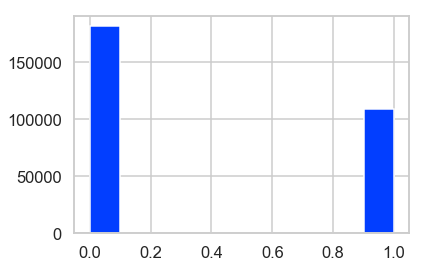

In [26]:
us['state'].hist()

In [27]:
us.groupby('state').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
state,,,,,,,,,,,,,,,
0,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585
1,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299


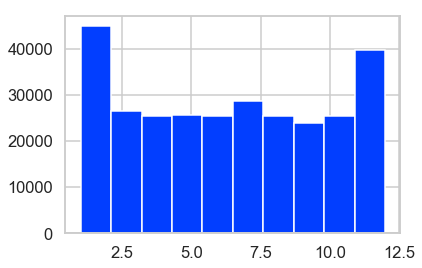

In [28]:
us['launched'].hist()

In [29]:
us['time_days'].mean()

34.71290617565765

In [30]:
us['time_days'].min()

1

In [31]:
us['time_days'].max()

14867

In [32]:
us = pd.get_dummies(us, columns=['main_category'])

In [33]:
us.head(10)

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,USD,2017-11-01,30000.0,9,2421.00,0,15,...,0,1,0,0,0,0,0,0,0,0
2,1000004038,Where is Hank?,Narrative Film,USD,2013-02-26,45000.0,1,220.00,0,3,...,0,1,0,0,0,0,0,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,3,1.00,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,7,1283.00,0,14,...,0,1,0,0,0,0,0,0,0,0
5,1000014025,Monarch Espresso Bar,Restaurants,USD,2016-04-01,50000.0,2,52375.00,1,224,...,0,0,1,0,0,0,0,0,0,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,12,1205.00,1,16,...,0,0,1,0,0,0,0,0,0,0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,USD,2016-03-17,25000.0,2,453.00,0,40,...,0,0,1,0,0,0,0,0,0,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,USD,2014-05-29,125000.0,4,8233.00,0,58,...,0,0,0,0,0,0,0,0,0,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,USD,2014-08-10,65000.0,7,6240.57,0,43,...,0,1,0,0,0,0,0,0,0,0
11,100005484,Lisa Lim New CD!,Indie Rock,USD,2013-04-08,12500.0,3,12700.00,1,100,...,0,0,0,0,0,1,0,0,0,0


# Modeling

In [34]:
X = us.drop(['ID', 'state', 'name', 'category', 'currency', 'deadline', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)
y = us['state']

In [35]:
X.columns

Index(['goal', 'launched', 'time_days', 'main_category_Art',
       'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
       'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 22)

#### Helper functions

In [37]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ['goal', 'launched', 'time_days', 'main_category_Art', 'main_category_Comics', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater']) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-score: {}".format(best_score))

#### SMOTE to account for class imbalance

In [38]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [39]:
# nr = NearMiss()
# X_train, y_train = nr.fit_sample(X_train, y_train)

### Models from US data:

### Dummy Classifier

In [40]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

In [41]:
print_metrics(y_test, dummy_pred)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.6225828076387576
F1 Score: 0.0


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
# Confusion matrix

pd.crosstab(y_test, dummy_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,36220,36220
1,21957,21957
All,58177,58177


### Decision Tree

In [43]:
tree = DecisionTreeClassifier(max_depth=16, random_state=22)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=22, splitter='best')

In [44]:
y_pred = tree.predict(X_test)

In [45]:
tree.score(X_train, y_train)

0.7024042926426581

In [46]:
print_metrics(y_test, y_pred)

Precision Score: 0.5278742001589227
Recall Score: 0.5748508448330828
Accuracy Score: 0.6454956426079035
F1 Score: 0.5503619080840673


In [47]:
roc_auc_score(y_test, y_pred)

0.6315861071211245

In [48]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,24931,11289,36220
1,9335,12622,21957
All,34266,23911,58177


### Random Forest

In [49]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 16, random_state=22)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [50]:
forest.score(X_train, y_train)

0.7083720290303718

In [51]:
print_metrics(y_test, y_pred)

Precision Score: 0.5278742001589227
Recall Score: 0.5748508448330828
Accuracy Score: 0.6454956426079035
F1 Score: 0.5503619080840673


In [52]:
roc_auc_score(y_test, y_pred)

0.6315861071211245

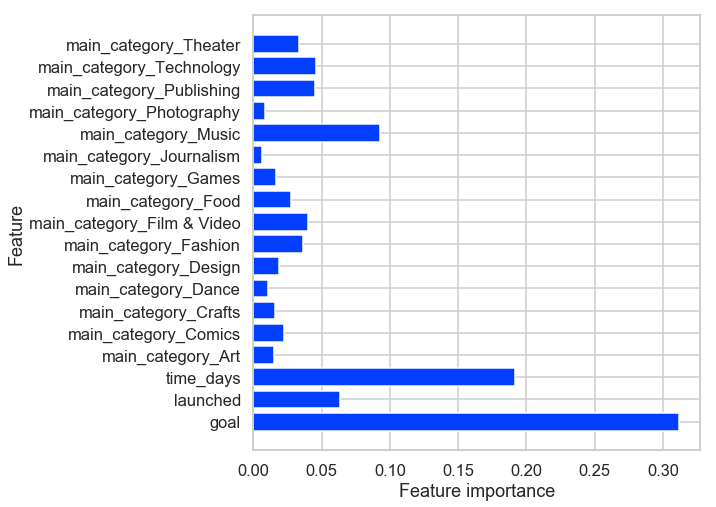

In [53]:
plot_feature_importances(forest, X_train)

### KNN

In [54]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [55]:
# find_best_k(X_train, y_train, X_test, y_test)

In [56]:
knn.score(X_train, y_train)

0.6680734702301104

In [57]:
print_metrics(y_test, y_pred)

Precision Score: 0.4897089880803236
Recall Score: 0.6230814774331648
Accuracy Score: 0.6126991766505664
F1 Score: 0.5484026135407063


In [58]:
roc_auc_score(y_test, y_pred)

0.6147433891859363

In [59]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,21964,14256,36220
1,8276,13681,21957
All,30240,27937,58177


### XGBoost

In [60]:
boost = xgb.XGBClassifier(max_depth=3, learning_rate=0.5, min_child_weight=10, subsample=0.7)
boost.fit(X_train, y_train)
y_pred = boost.predict(np.array(X_test))

In [61]:
boost.score(X_train, y_train)

0.7017886011075568

In [62]:
print_metrics(y_test, y_pred)

Precision Score: 0.5530240644157746
Recall Score: 0.5505305825021634
Accuracy Score: 0.6624267322137615
F1 Score: 0.5517745064475637


In [63]:
roc_auc_score(y_test, y_pred)

0.640395053813202

In [64]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,26450,9770,36220
1,9869,12088,21957
All,36319,21858,58177


#### GridSearchCV Tuning

In [65]:
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.5],
#     'min_child_weight': [10],
#     'subsample': [0.7]
# }

In [66]:
# grid_clf = GridSearchCV(boost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
# grid_clf.fit(X_train, y_train)

# best_parameters = grid_clf.best_params_

# print("GridSearchCV found the following optimal parameters: ")
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

# training_preds = grid_clf.predict(X_train)
# val_preds = grid_clf.predict(np.array(X_test))
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("")
# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

# Testing on other countries

## GB

In [67]:
gb = df[df['country'] == 'GB']

In [68]:
gb['state'] = gb['state'].map({'successful': 1, 'failed': 0, 'canceled': 0, 'suspended': 0})

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
gb = pd.get_dummies(gb, columns=['main_category'])

In [70]:
y_test = gb['state']

In [71]:
gb = gb.drop(['ID', 'state', 'name', 'category', 'currency', 'deadline', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)

### Decision Tree

In [72]:
y_pred = tree.predict(gb)

In [73]:
print_metrics(y_test, y_pred)

Precision Score: 0.5078621397856363
Recall Score: 0.6557553658738708
Accuracy Score: 0.6459631049353138
F1 Score: 0.5724103009259259


In [74]:
roc_auc_score(y_test, y_pred)

0.6480887028665955

In [75]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,13657,7668,21325
1,4154,7913,12067
All,17811,15581,33392


### Random Forest

In [76]:
y_pred = forest.predict(gb)

In [77]:
print_metrics(y_test, y_pred)

Precision Score: 0.5162583798007644
Recall Score: 0.6828540648048397
Accuracy Score: 0.6541686631528509
F1 Score: 0.5879834451263023


In [78]:
roc_auc_score(y_test, y_pred)

0.6603953794129708

In [79]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,13604,7721,21325
1,3827,8240,12067
All,17431,15961,33392


### XGBoost

In [80]:
y_pred = boost.predict(np.array(gb))

In [81]:
print_metrics(y_test, y_pred)

Precision Score: 0.5335604770017036
Recall Score: 0.6488771028424629
Accuracy Score: 0.668124101581217
F1 Score: 0.5855956921696208


In [82]:
roc_auc_score(y_test, y_pred)

0.6639461715853581

In [83]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,14480,6845,21325
1,4237,7830,12067
All,18717,14675,33392


## CA

In [84]:
ca = df[df['country'] == 'CA']

In [85]:
ca['state'] = ca['state'].map({'successful': 1, 'failed': 0, 'canceled': 0, 'suspended': 0})

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
ca = pd.get_dummies(ca, columns=['main_category'])

In [87]:
y_test = ca['state']

In [88]:
ca = ca.drop(['ID', 'state', 'name', 'category', 'currency', 'deadline', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real','usd_goal_real'], axis=1)

### Decesion Tree

In [89]:
y_pred = tree.predict(ca)

In [90]:
print_metrics(y_test, y_pred)

Precision Score: 0.4266967397990568
Recall Score: 0.5033865505563618
Accuracy Score: 0.668421772428884
F1 Score: 0.4618799245366774


In [91]:
roc_auc_score(y_test, y_pred)

0.6184234945346155

In [92]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7694,2796,10490
1,2053,2081,4134
All,9747,4877,14624


### Random forest

In [93]:
y_pred = forest.predict(ca)

In [94]:
print_metrics(y_test, y_pred)

Precision Score: 0.44458385612714346
Recall Score: 0.5142718916303822
Accuracy Score: 0.6810722100656456
F1 Score: 0.4768954688200987


In [95]:
roc_auc_score(y_test, y_pred)

0.6305391869972694

In [96]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7834,2656,10490
1,2008,2126,4134
All,9842,4782,14624


### XGBoost

In [97]:
y_pred = boost.predict(np.array(ca))

In [98]:
print_metrics(y_test, y_pred)

Precision Score: 0.462155152086772
Recall Score: 0.4741170778906628
Accuracy Score: 0.6953637855579868
F1 Score: 0.4680597014925373


In [99]:
roc_auc_score(y_test, y_pred)

0.6283359459996688

In [100]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8209,2281,10490
1,2174,1960,4134
All,10383,4241,14624
